In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Load the data into a pandas DataFrame
df = pd.read_csv('../../data/processed/airport_cleaned.csv')
df1= pd.read_csv('../../data/processed/chakala_cleaned.csv')
df2= pd.read_csv('../../data/processed/kurla_cleaned.csv')

In [27]:
# Convert the 'Date' column to a datetime object
df['From Date'] = pd.to_datetime(df['From Date'])
df1['From Date'] = pd.to_datetime(df['From Date'])
df2['From Date'] = pd.to_datetime(df['From Date'])


In [28]:

# Extract the month, season, and hour from the 'Date' column
df['Month'] = df['From Date'].dt.month
df['Season'] = (df['Month'] % 12 + 3) // 3
df['Hour'] = df['HOUR']

# Extract the month, season, and hour from the 'Date' column
df1['Month'] = df1['From Date'].dt.month
df1['Season'] = (df1['Month'] % 12 + 3) // 3
df1['Hour'] = df1['HOUR']

# Extract the month, season, and hour from the 'Date' column
df2['Month'] = df2['From Date'].dt.month
df2['Season'] = (df2['Month'] % 12 + 3) // 3
df2['Hour'] = df2['HOUR']


In [29]:
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month = df.groupby('Month').mean()
grouped_season = df.groupby('Season').mean()
grouped_hour = df.groupby('Hour').mean()
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month1 = df1.groupby('Month').mean()
grouped_season1 = df1.groupby('Season').mean()
grouped_hour1 = df1.groupby('Hour').mean()
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month2 = df2.groupby('Month').mean()
grouped_season2 = df2.groupby('Season').mean()
grouped_hour2 = df2.groupby('Hour').mean()

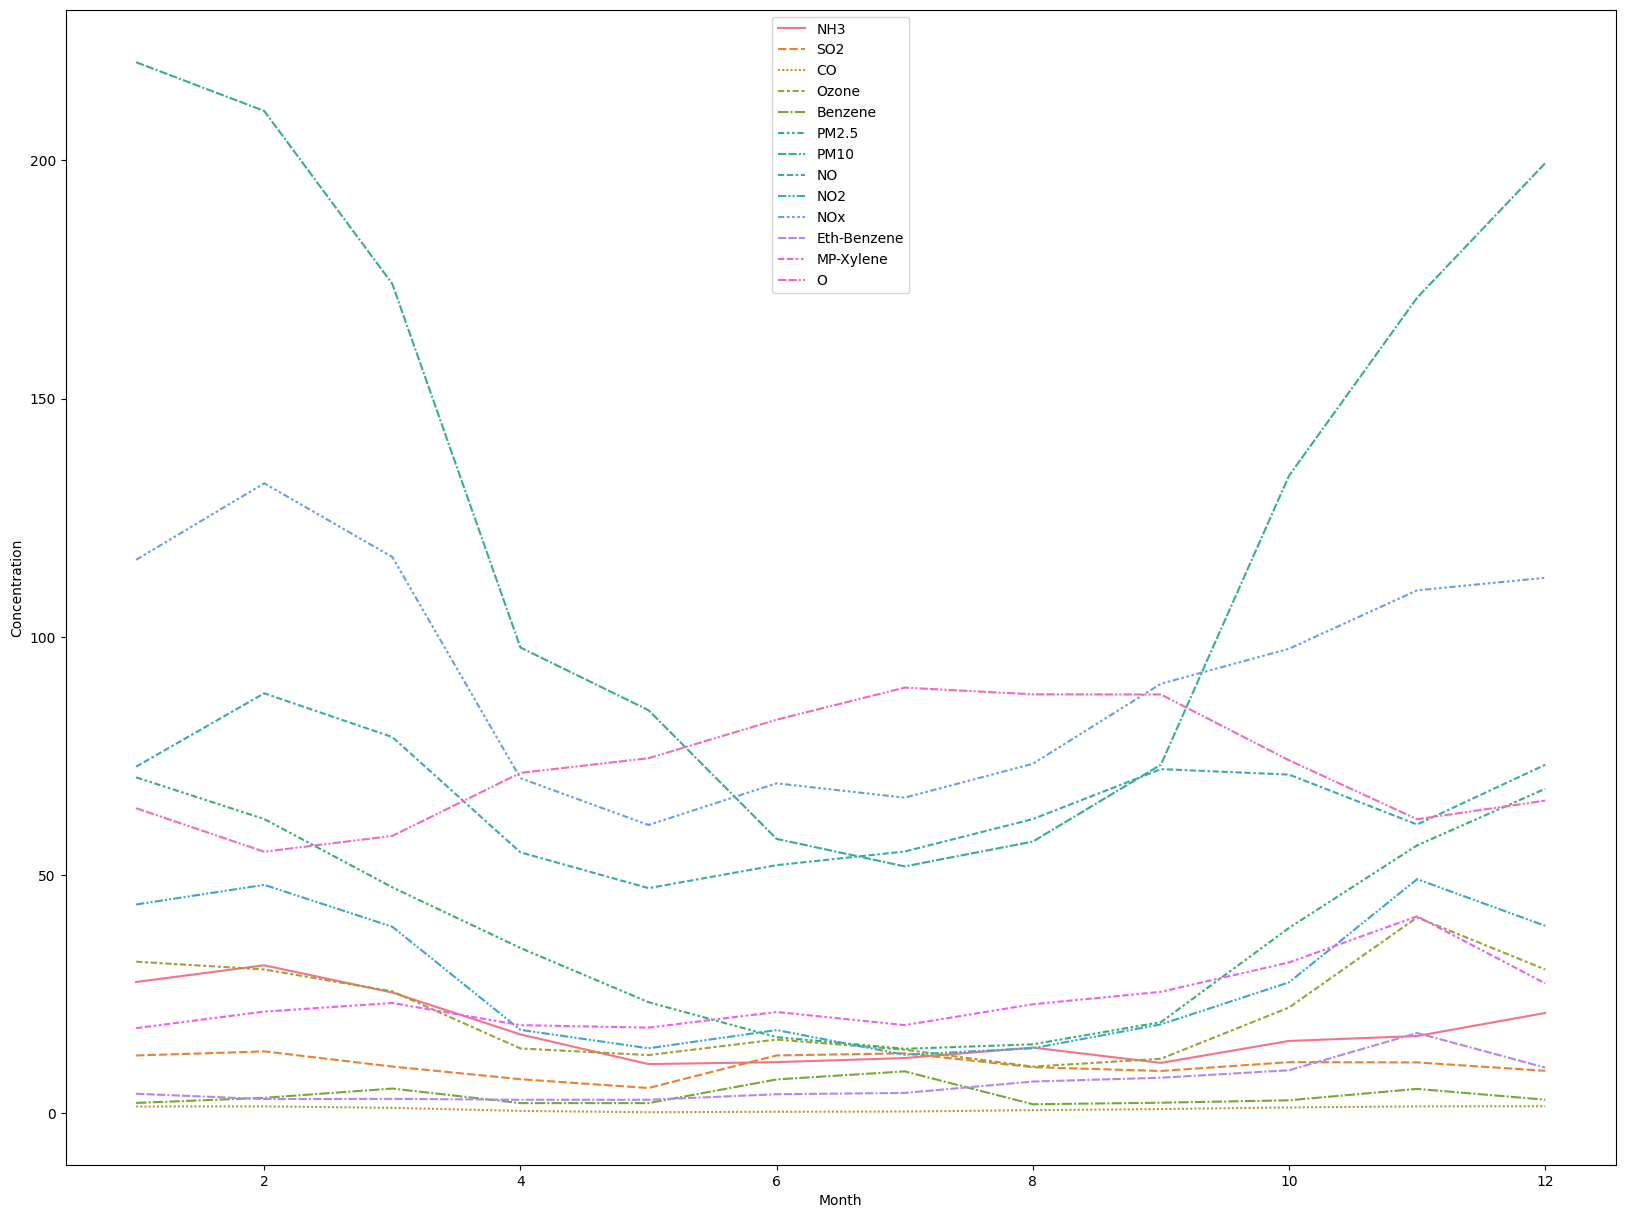

In [30]:
# Plot the mean concentration of each pollutant by month, season, and hour
plt.figure(figsize=(20,15))
sns.lineplot(data=grouped_month[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.show()


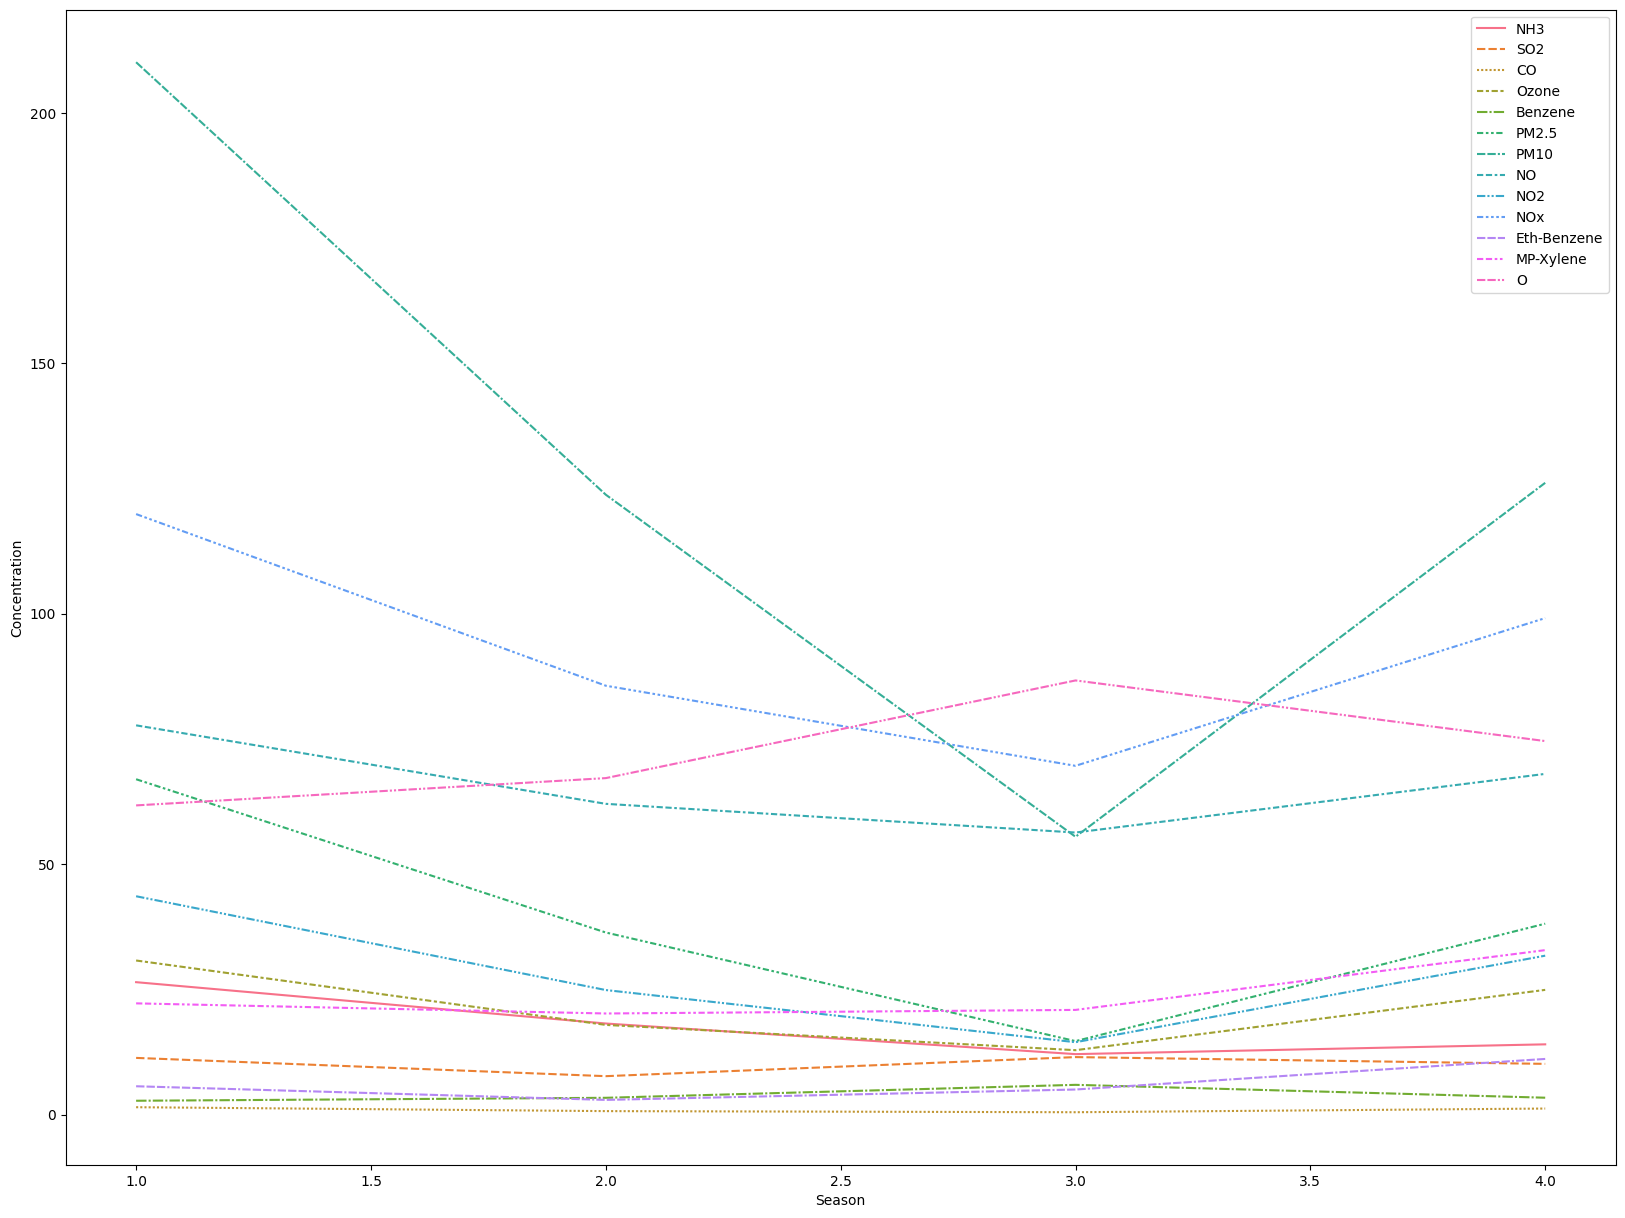

In [31]:
plt.figure(figsize=(20,15))
sns.lineplot(data=grouped_season[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Season')
plt.ylabel('Concentration')
plt.show()


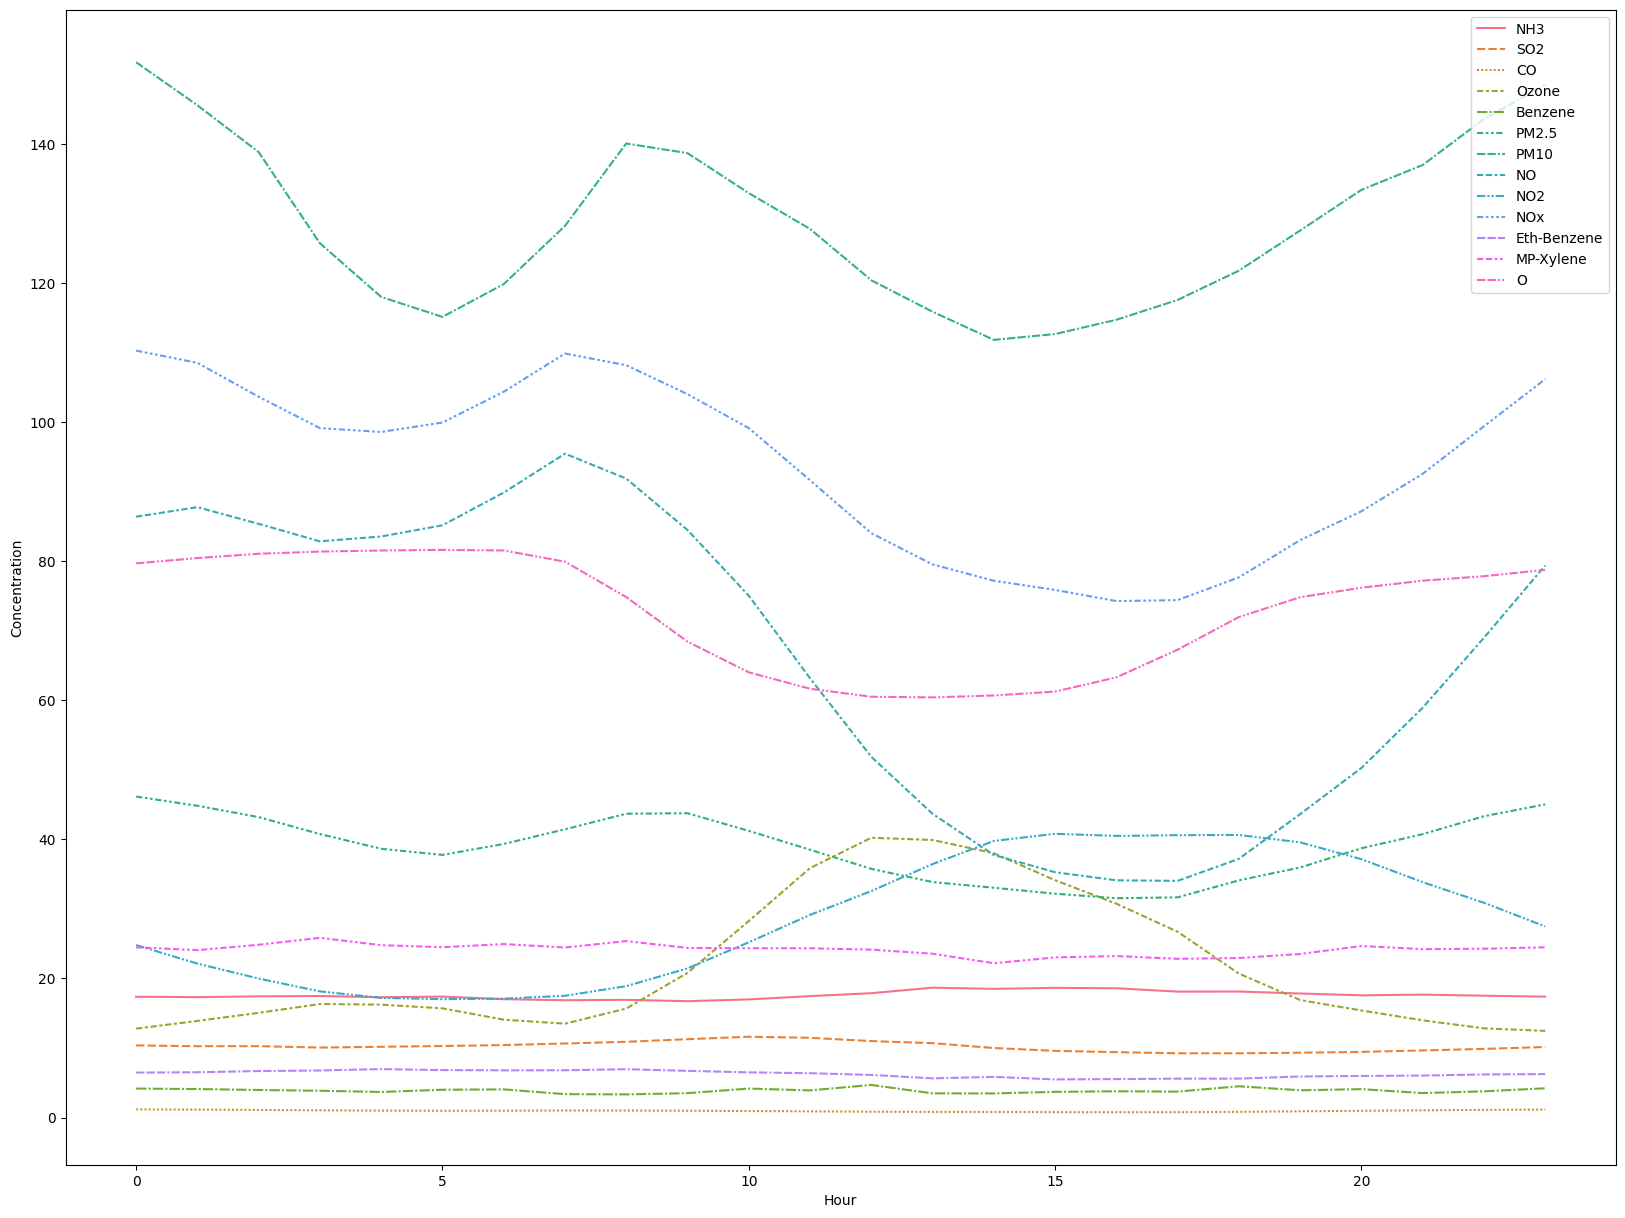

In [32]:
plt.figure(figsize=(20,15))
sns.lineplot(data=grouped_hour[['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Eth-Benzene', 'MP-Xylene', 'O']])
plt.xlabel('Hour')
plt.ylabel('Concentration')
plt.show()

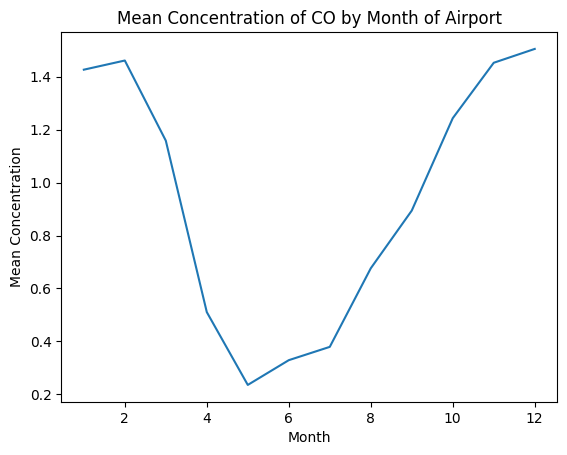

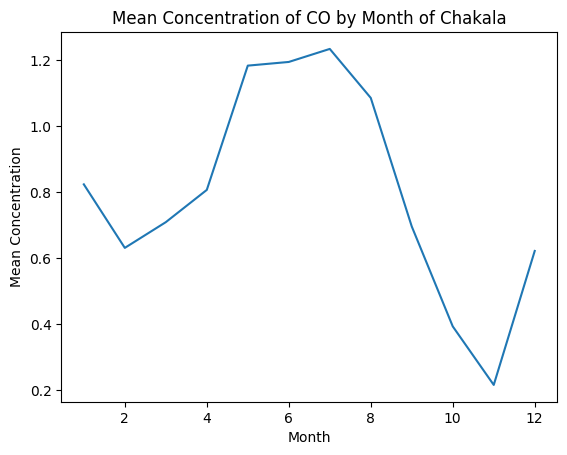

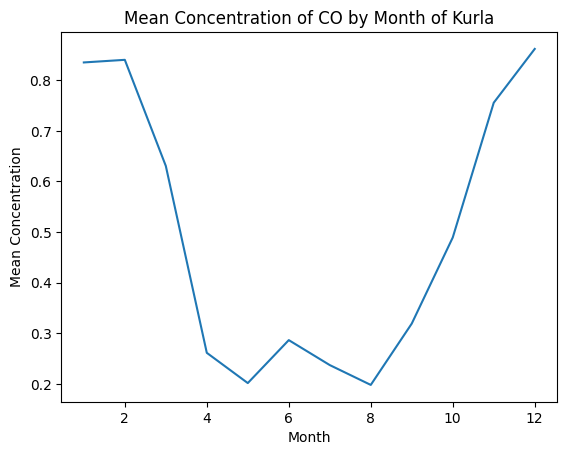

In [37]:
# Select a single pollutant
pollutant = 'CO'

# Extract the month and concentration for the selected pollutant
df_pollutant = df.loc[:, ['From Date', pollutant]]
df_pollutant['month'] = df_pollutant['From Date'].dt.month
# Extract the month and concentration for the selected pollutant
df_pollutant1 = df1.loc[:, ['From Date', pollutant]]
df_pollutant1['month'] = df_pollutant1['From Date'].dt.month
# Extract the month and concentration for the selected pollutant
df_pollutant2 = df2.loc[:, ['From Date', pollutant]]
df_pollutant2['month'] = df_pollutant2['From Date'].dt.month

# Calculate the mean concentration by month
monthly_mean = df_pollutant.groupby('month')[pollutant].mean()
# Calculate the mean concentration by month
monthly_mean1 = df_pollutant1.groupby('month')[pollutant].mean()
# Calculate the mean concentration by month
monthly_mean2 = df_pollutant2.groupby('month')[pollutant].mean()

# Plot the mean concentration by month
plt.plot(monthly_mean)
plt.xlabel('Month')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of {} by Month of Airport'.format(pollutant))
plt.show()
# Plot the mean concentration by month
plt.plot(monthly_mean1)
plt.xlabel('Month')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of {} by Month of Chakala'.format(pollutant))
plt.show()
# Plot the mean concentration by month
plt.plot(monthly_mean2)
plt.xlabel('Month')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of {} by Month of Kurla'.format(pollutant))
plt.show()

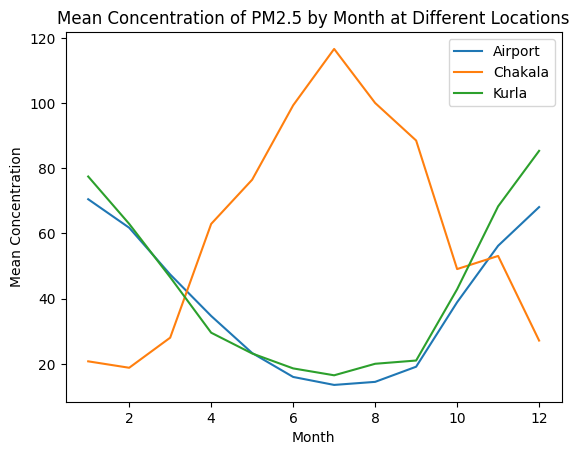

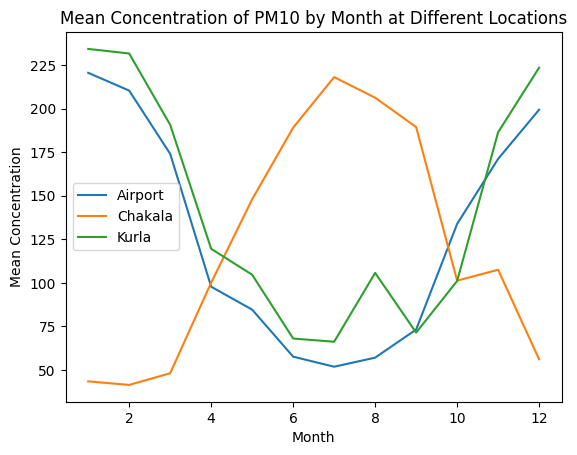

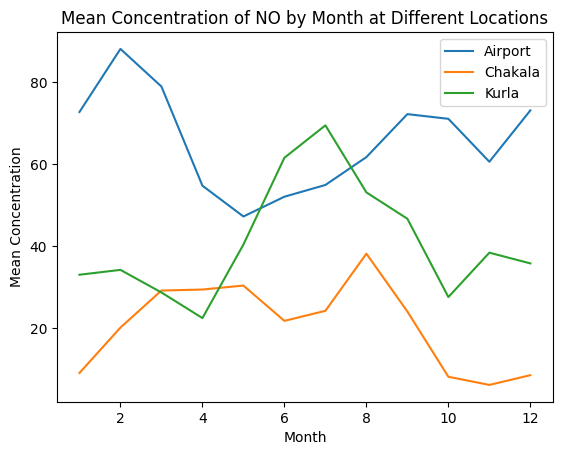

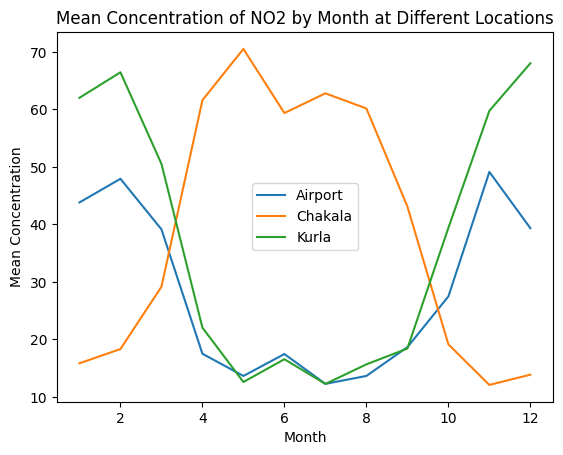

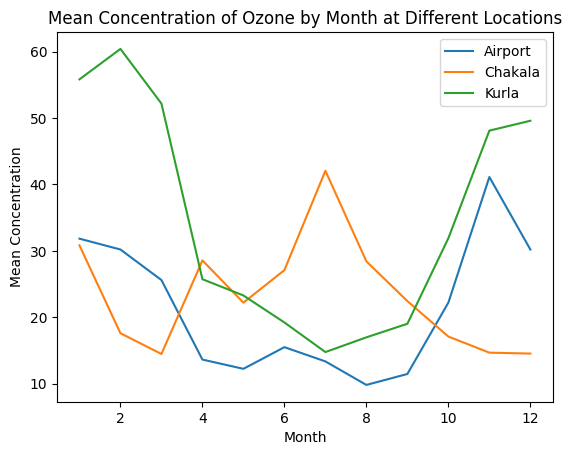

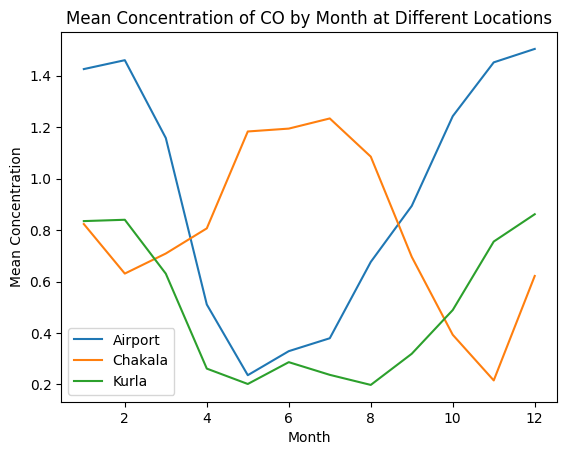

In [41]:
# Select a single pollutant
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'Ozone', 'CO']
for pollutant in pollutants:
    # Extract the month and concentration for the selected pollutant and locations
    df_airport_pollutant = df.loc[:, ['From Date', pollutant]]
    df_airport_pollutant['month'] = df_airport_pollutant['From Date'].dt.month
    monthly_mean_airport = df_airport_pollutant.groupby('month')[pollutant].mean()

    df_chakala_pollutant = df1.loc[:, ['From Date', pollutant]]
    df_chakala_pollutant['month'] = df_chakala_pollutant['From Date'].dt.month
    monthly_mean_chakala = df_chakala_pollutant.groupby('month')[pollutant].mean()

    df_kurla_pollutant = df2.loc[:, ['From Date', pollutant]]
    df_kurla_pollutant['month'] = df_kurla_pollutant['From Date'].dt.month
    monthly_mean_kurla = df_kurla_pollutant.groupby('month')[pollutant].mean()

    # Plot the mean concentration by month for all three locations
    plt.plot(monthly_mean_airport, label='Airport')
    plt.plot(monthly_mean_chakala, label='Chakala')
    plt.plot(monthly_mean_kurla, label='Kurla')
    plt.xlabel('Month')
    plt.ylabel('Mean Concentration')
    plt.title('Mean Concentration of {} by Month at Different Locations'.format(pollutant))
    plt.legend()
    plt.show()